$\Large{\text{Clustering using K-Means}}$

Given data set $D=\{(x^i)\}_{i=1}^{m}$ of points $x^i \in {\mathbb{R}}^d$, we wish to cluster these points into groups. The clustering should be done in such a way that the points belonging to the same group (or) cluster should be similar when compared to the points from other groups (or) clusters.

Define the set $\mathcal{P}$ containing all $K$-partitions of data set $D$ to be of the following form:

$
\mathcal{P} = \{(C_1,C_2,\ldots,C_K): \emptyset \neq C_i \subseteq D, \forall i \in \{1,2,\ldots,K\}, C_i \cap C_j = \emptyset, \ \forall i \neq j, \ i,j \in \{1,2,\ldots,K\}, \cup_{i=1}^{K} C_i = D\}.
$


Note that the set $\mathcal{P}$ contains all possible $K$-tuples of the form $C_1,C_2,\ldots,C_K$ where the following hold:

1. each cluster $C_i$ is non-empty
2. each cluster $C_i$ is a sub-set of the data set $D$
3. two different clusters $C_i, C_j$ where $i \neq j$, do not have any points in common ($\textbf{hard clustering}$
4. every data point in data set $D$ is contained in at least one cluster.

$\large{\text{Objective function for clustering}}$

Given the number of clusters $K$, the clustering is achieved by finding a partition $(C_1,C_2,\ldots,C_K) \in \mathcal{P}$, such that the following objective is optimized:

$
\begin{align}
\min_{ (C_1,C_2,\ldots,C_K) \in \mathcal{P} } \sum_{k=1}^{K} \sum_{x \in C_k} \|x-\frac{1}{|C_k|}\sum_{u \in C_k} u\|
\end{align}
$

This optimization objective can be equivalenty written as:
$
\begin{align}
\min_{(C_1,C_2,\ldots,C_K) \subseteq D^K} \sum_{k=1}^{K} \sum_{x \in C_k} \|x-\mu^k\|
\end{align}
$
where $\mu^k = \frac{1}{|C_k|}\sum_{u \in C_k} u$ is called the $\textbf{mean}$ or $\textbf{centroid}$ of cluster $k$.

In general, solving this optimization problem is NP-hard. However an iterative technique called $K$-Means algorithm has been developed which can effectively cluster the points by finding a local optimum of the above optimization problem.

The idea of the algorithm is as follows:

*   Input: Data set $D=\{(x^i)\}_{i=1}^{m}, K$.
*   Start with a random initialization of means $(\mu^1,\mu^2,\ldots,\mu^K)$ (usually identified from the data set itself).
*   Repeat:
  1. Construct partition $(C_1,C_2,\ldots,C_K) \in \mathcal{P}$ such that $C_j$ contains points from $D$ which are closer to $\mu^j,$  $\forall j \in \{1,2,\ldots,K\}$.
  2. Recompute means $\mu^j = \frac{1}{|C_j|} \sum_{x \in C_j} x, \forall j\in \{1,2,\ldots,K\}$.

    Until partition $(C_1,C_2,\ldots,C_K)$ does not change.




In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Please copy the 'cluster_example.txt' file to the current folder in colab
#read the txt file into a data frame
df= pd.read_csv('cluster_example.txt', sep=',',index_col=None,header = None)

In [ ]:
df.head()

,0,1,2
0,664159.0,550946.0,14
1,665845.0,557965.0,14
2,597173.0,575538.0,14
3,618600.0,551446.0,14
4,635690.0,608046.0,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [ ]:
#plot the number of rows and columns in df
print('shape of data:(', len(df.index), len(df.columns),')')

shape of data:( 5000 3 )


<Axes: xlabel='0', ylabel='1'>

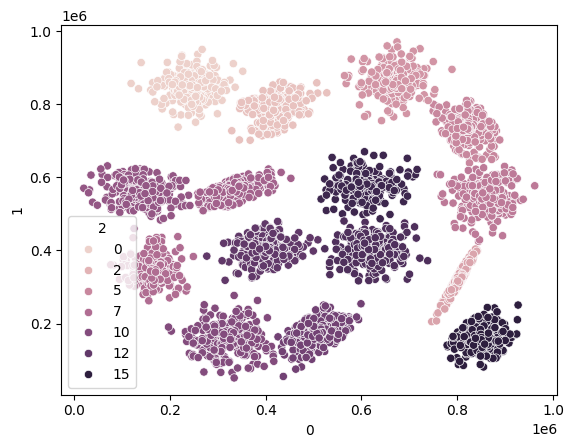

In [ ]:
#since the data is 2D, let us do a scatter plot
import seaborn as sns
sns.scatterplot(x=df[0],y=df[1],hue=df[2])

In [ ]:
#Let us try to do a clustering of the given data using K-Means algorithm
#import K-Means library from scikit learn
from sklearn.cluster import KMeans

In [ ]:
#first let us convert the dataframe to a nupy array since K-Means library from scikit learn accepts numpy arrays only
X = df.to_numpy()
X=X[:,0:2]

In [ ]:
#print the size of data
print('shape of data:', X.shape)

shape of data: (5000, 2)


In [ ]:
#check the contents of X
X

array([[664159., 550946.],
       [665845., 557965.],
       [597173., 575538.],
       ...,
       [650661., 861267.],
       [599647., 858702.],
       [684091., 842566.]])

# K Means algorithm

In [ ]:
#palette=['red','green','blue','yellow','cyan','magenta','brown']

def get_sample_indices_for_cluster(labels, j):
  #get sample indices belonging to cluster j
  ind = np.where(labels==j)
  return ind

def get_cluster_associations(X,centroids,k):
  #associate points to closest centroids
  #distances = np.zeros((len(X), k))
  labels = np.zeros((len(X)))
  for i in np.arange(len(X)):
    dist_i = np.inf
    clabel = -99
    for j in np.arange(k):
      #print(X[i])
      #print(centroids[j])
      dist = np.linalg.norm(X[i]-centroids[j])
      if dist<dist_i:
        dist_i = dist
        clabel=j
    labels[i] = clabel
  return labels

def recompute_centroids(X,labels,k):
  centroids = np.zeros((k,X.shape[1]))
  for j in np.arange(k):
      indices = get_sample_indices_for_cluster(labels, j)
      samples = X[indices]
      centroids[j] = np.mean(samples, axis=0)
  return centroids


def custom_k_means(X, k, verbose = 0, ssd = False, silh=False):
  #Input matrix X must have sample features in columns, k>=2
  assert k>=2,'k means: k must be at least 2, got:'+str(k)
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  tol = 1e-6
  centroids = X[indices[0:k]]
  if verbose>2:
    print(centroids)
    print('************')
  labels=get_cluster_associations(X,centroids,k)
  #print(labels)

  if verbose>0:
    plt.figure()
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels, palette=sns.color_palette("Paired")).set_title('Initial')
    sns.scatterplot(x=centroids[:, 0],y=centroids[:, 1], s=100, c='black')

  prev_centroids = centroids
  iter = 0
  while True:
    iter+=1
    if verbose>0:
      print('k means iter:',iter)
    #recompute cluster centroids
    new_centroids = recompute_centroids(X,labels,k)
    if verbose>2:
      print(new_centroids)
      print('***************')

    #get sample associations with corresponding cluster centroids
    labels = get_cluster_associations(X,new_centroids,k)

    if np.linalg.norm(new_centroids-prev_centroids) < tol:
      print('k:%d no change in cluster centroids, quitting k means after %d iterations:' %(k,iter))
      break
    prev_centroids = new_centroids


  centroids = new_centroids

  if verbose>0:
    plt.figure()
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels, palette=sns.color_palette("Paired")).set_title('Final')
    sns.scatterplot(x=centroids[:, 0],y=centroids[:, 1], s=100, c='black')

  return labels, centroids


<ipython-input-41-e888800e40ad>:49: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels, palette=sns.color_palette("Paired")).set_title('Initial')


k means iter: 1
k means iter: 2
k means iter: 3
k means iter: 4
k means iter: 5
k means iter: 6
k means iter: 7
k means iter: 8
k means iter: 9
k means iter: 10
k means iter: 11
k:3 no change in cluster centroids, quitting k means after 11 iterations:


<ipython-input-41-e888800e40ad>:77: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels, palette=sns.color_palette("Paired")).set_title('Final')


(array([0., 0., 0., ..., 0., 1., 0.]),
 array([[751227.65086398, 513561.5423128 ],
        [286816.38728751, 690766.50036955],
        [353312.52014388, 273259.70359712]]))

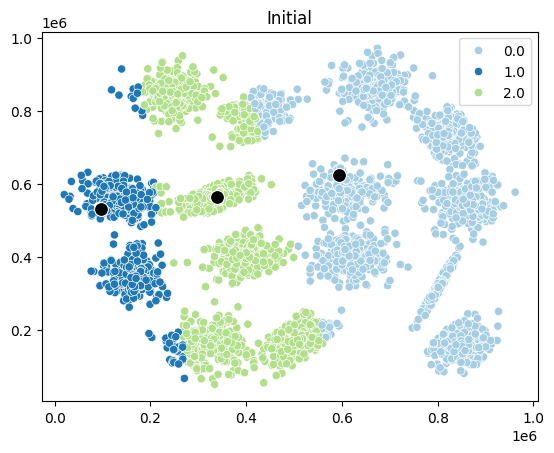

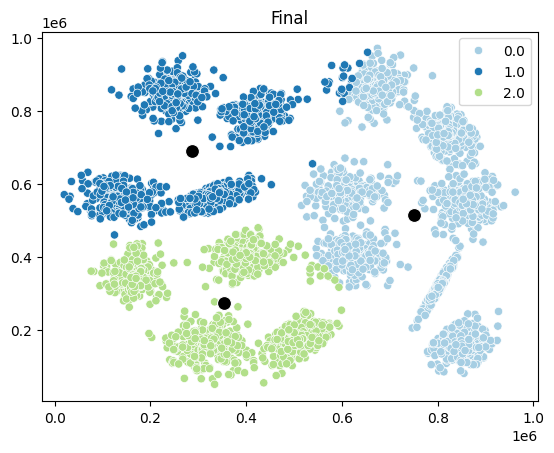

In [ ]:
custom_k_means(X,3,verbose=1)

## Computing sum of squared distances of points in each cluster to their respective centroids

In [ ]:
def compute_ssd(X,labels,centroids,k):
  ssd = 0.
  for j in np.arange(k):
      indices = get_sample_indices_for_cluster(labels, j)
      samples = X[indices]
      #print(len(indices),len(samples))
      ssd_c = 0.
      for i in np.arange(len(samples)):
        ssd_c += np.linalg.norm(samples[i]-centroids[j])**2
      ssd += ssd_c
  return ssd

## Choosing k using elbow method

k:2 no change in cluster centroids, quitting k means after 9 iterations:
k:3 no change in cluster centroids, quitting k means after 12 iterations:
k:4 no change in cluster centroids, quitting k means after 25 iterations:
k:5 no change in cluster centroids, quitting k means after 12 iterations:
k:6 no change in cluster centroids, quitting k means after 18 iterations:
k:7 no change in cluster centroids, quitting k means after 15 iterations:
k:8 no change in cluster centroids, quitting k means after 9 iterations:
k:9 no change in cluster centroids, quitting k means after 22 iterations:
k:10 no change in cluster centroids, quitting k means after 6 iterations:
k:11 no change in cluster centroids, quitting k means after 17 iterations:
k:12 no change in cluster centroids, quitting k means after 16 iterations:
k:13 no change in cluster centroids, quitting k means after 10 iterations:
k:14 no change in cluster centroids, quitting k means after 25 iterations:


Text(0.5, 1.0, 'Num clusters vs SSD')

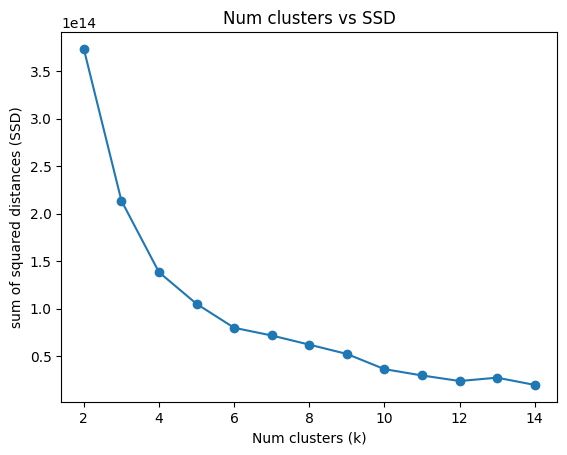

In [ ]:
#choosing k using elbow method
K = 15
ssds = []
k_list = np.arange(2,K)
for j in k_list:
  labels, centroids = custom_k_means(X,j)
  ssd = compute_ssd(X, labels, centroids, j)
  ssds.append(ssd)

fig = plt.figure()
plt.plot(k_list, ssds, marker = 'o')
plt.ylabel('sum of squared distances (SSD)')
plt.xlabel('Num clusters (k)')
plt.title('Num clusters vs SSD')

## Detecting knee/elbow point in the plot

Knee point (or elbow point) in the plot can be identified in various ways. Several algorithms exist for this:

1. angle-based approach
2. curvature based approach (e.g. Menger curvature, kneedle algorithm)
3. exponential weighted moving average approach.

We shall use the kneedle approach to find the knee point.

In [ ]:
! pip3 install kneed

5


Text(0.5, 1.0, 'Num clusters vs SSD')

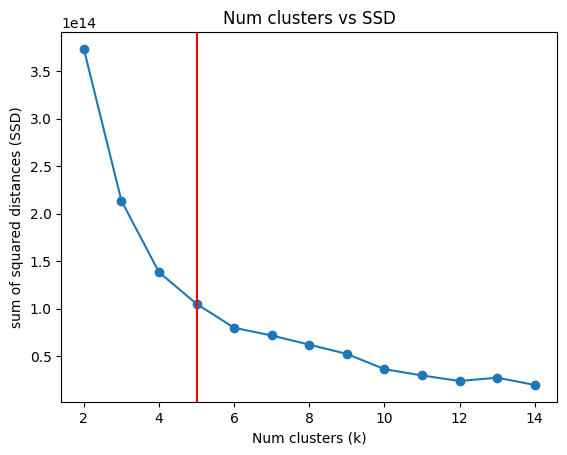

In [ ]:
from kneed import KneeLocator

def find_knee_point(x,y):
  k = KneeLocator(x=x,  y=y,
                 curve='convex',
                 direction='decreasing')

  return k

best_k = find_knee_point(k_list, ssds)
best_k = best_k.elbow
print(best_k)
fig = plt.figure()
plt.plot(k_list, ssds, marker = 'o')
plt.axvline(x=best_k, color='red')
plt.ylabel('sum of squared distances (SSD)')
plt.xlabel('Num clusters (k)')
plt.title('Num clusters vs SSD')


## Silhoutte Coefficient for determining k

Silhoutte coefficient is defined based on the following procedure:

For each point $x^i$ in the data set $D$, we compute three quantitites:

1)
Suppose that $x^i$ belongs to cluster $C_j$ (and assume that $C_j$ contains at least 2 data points). Then we compute:

$
a_i = \frac{1}{|C_j|-1} \sum\limits_{\substack{x \in C_j} \\ {x \neq x^i}} \text{dist}(x^i, x)
$

which denotes the mean of distances between $x^i$ and other distinct points $x \neq x^i$. This measure determines how close the point $x^i$ is with other points in its cluster.


2)
We further compute:

$
b_i = \min_{m \neq j} \frac{1}{|C_m|} \sum_{x \in C_m} \text{dist}(x^i, x)
$

which denotes the minimum of mean of distances between $x^i$ and other points $x$ which belong to other clusters $C_m$ where $m \neq j$.

3)
Using $a_i$ and $b_i$ we compute the following quantity called pointwise silhoutte score:

$
s_i = \frac{b_i - a_i}{\max(a_i, b_i)}
$

which denotes a normalized difference between the (minimum) intercluster mean distance $b_i$ and intracluster mean distance $a_i$.

Ideally if the clustering is good, we would want the (minimum) intercluster mean distance $b_i$ to be much larger than the intracluster mean distance $a_i$.

Note that $s_i \in [-1, 1]$.

Further when $s_i$ is close to $1$, we see that the clustering quality is good.

Now we are ready to compute the data set based silhoutte coefficient.

We compute the silhoutte coefficient $s_D$ for data set $D$ as the mean of $s_i$ values corresponding to $x^i \in D$:
$
s_D = \frac{1}{|D|} \sum\limits_{i:x^i \in D} s_i.
$

$\textbf{Exercise:}$ Note that we assumed that $x^i$ belongs to a cluster $C_j$ which has at least 2 data points. How can we define $a_i$ when the cluster $C_j$ contains only the single data point $x^i$?



In [ ]:
from timeit import default_timer as timer

def compute_dist_matrix(X):
  dist_matrix = np.zeros((len(X), len(X)))
  for i in range(len(X)):
    for j in range(i):
      if i!=j:
        dist_matrix[i,j] = np.linalg.norm(X[i]-X[j])**2
        dist_matrix[j,i] = dist_matrix[i,j]
  return dist_matrix

def compute_intracluster_dist(dist_matrix,indices_of_samples_in_cluster,cluster_index,sample_ref_index):
  ssd = 0.
  for idx in indices_of_samples_in_cluster:
    if idx != sample_ref_index:
      ssd+=dist_matrix[idx][sample_ref_index]
  if len(indices_of_samples_in_cluster)>1:
    intraclusdist = ssd/(len(indices_of_samples_in_cluster)-1)
  else:
    intraclusdist = 0.
  return intraclusdist

def compute_intercluster_dist(dist_matrix,indices_of_samples_in_other_cluster,sample_ref_index):
  ssd = 0.
  for idx in indices_of_samples_in_other_cluster:
      ssd+=dist_matrix[idx][sample_ref_index]
  if len(indices_of_samples_in_other_cluster)>0:
    interclusdist = ssd/len(indices_of_samples_in_other_cluster)
  else: #we should not see this else condition ideally
    interclusdist = np.inf
  return interclusdist

def compute_min_intercluster_dist(dist_matrix,num_clusters_k,labels,cluster_index,sample_ref_index):
  min_dist = np.inf
  best_neighbor_cluster = -1
  for j in np.arange(num_clusters_k):
    if j != cluster_index:
      other_cluster_indices = get_sample_indices_for_cluster(labels, j)[0]
      interclustdist_j = compute_intercluster_dist(dist_matrix,other_cluster_indices,sample_ref_index)
      if min_dist>interclustdist_j:
        min_dist = interclustdist_j
        best_neighbor_cluster = j
  return min_dist, best_neighbor_cluster



def compute_silhoutte_coefficient(X,dist_matrix,labels,centroids,k):
  silhoutte_i = np.zeros(len(X))

  for j in np.arange(k):
      indices = get_sample_indices_for_cluster(labels, j)[0]
      #print('indices:',indices)
      if len(indices) == 1:
        for idx in list(indices):
          silhoutte_i[idx] = 0.
          #print('idx:',idx,'s_i:',silhoutte_i[idx])
      else:
        for idx in list(indices):
          a_i = compute_intracluster_dist(dist_matrix,indices,j,idx)
          b_i,_ = compute_min_intercluster_dist(dist_matrix,k,labels,j,idx)
          silhoutte_i[idx] = (b_i - a_i)/(max(a_i,b_i))
          #print('idx:',idx,'s_i:',silhoutte_i[idx])
  return np.mean(silhoutte_i)


In [ ]:
#choosing k using sihoutte score method
K = 15
silhoutte_coef_list = []
k_list = np.arange(2,K)

start = timer()
dist_matrix = compute_dist_matrix(X)
end=timer()
print('distance matrix computed in time:',end-start)


for j in k_list:
  labels, centroids = custom_k_means(X,j)
  silh = compute_silhoutte_coefficient(X, dist_matrix, labels, centroids, j)
  print('silh for k:',j, 'is: ', silh)
  silhoutte_coef_list.append(silh)


distance matrix computed in time: 90.64828604600007
k:2 no change in cluster centroids, quitting k means after 6 iterations:
silh for k: 2 is:  0.5467175007513592
k:3 no change in cluster centroids, quitting k means after 8 iterations:
silh for k: 3 is:  0.5690800949888423
k:4 no change in cluster centroids, quitting k means after 10 iterations:
silh for k: 4 is:  0.6146624912761585
k:5 no change in cluster centroids, quitting k means after 6 iterations:
silh for k: 5 is:  0.6183616632464525
k:6 no change in cluster centroids, quitting k means after 28 iterations:
silh for k: 6 is:  0.6568939149248048
k:7 no change in cluster centroids, quitting k means after 15 iterations:
silh for k: 7 is:  0.6773312442222106
k:8 no change in cluster centroids, quitting k means after 11 iterations:
silh for k: 8 is:  0.6949261133003366
k:9 no change in cluster centroids, quitting k means after 12 iterations:
silh for k: 9 is:  0.7002998784405935
k:10 no change in cluster centroids, quitting k means a

In [ ]:
print(np.array(silhoutte_coef_list))
print(np.argmax(np.array(silhoutte_coef_list)))

[0.5467175  0.56908009 0.61466249 0.61836166 0.65689391 0.67733124
 0.69492611 0.70029988 0.69125084 0.74350707 0.73135968 0.78190655
 0.7526704 ]
11


13


Text(0.5, 1.0, 'Num clusters vs Silhoutte Coefficient')

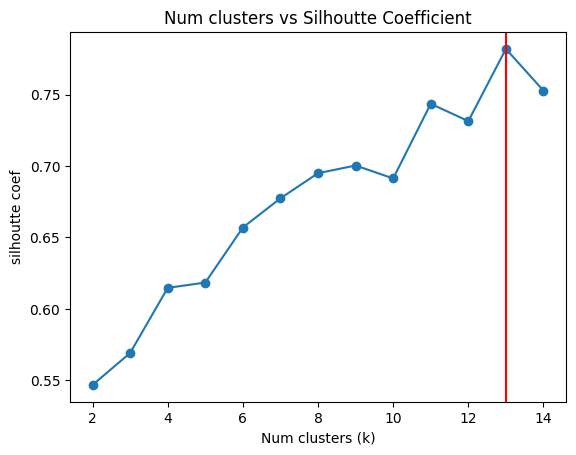

In [ ]:
best_k_silh = k_list[np.argmax(np.array(silhoutte_coef_list))]
print(best_k_silh)
fig = plt.figure()
plt.plot(k_list, silhoutte_coef_list, marker = 'o')
plt.axvline(best_k_silh, color='red')
plt.ylabel('silhoutte coef')
plt.xlabel('Num clusters (k)')
plt.title('Num clusters vs Silhoutte Coefficient')

<ipython-input-41-e888800e40ad>:49: UserWarning: 
The palette list has fewer values (12) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels, palette=sns.color_palette("Paired")).set_title('Initial')


k means iter: 1
k means iter: 2
k means iter: 3
k means iter: 4
k means iter: 5
k means iter: 6
k means iter: 7
k means iter: 8
k means iter: 9
k means iter: 10
k means iter: 11
k:13 no change in cluster centroids, quitting k means after 11 iterations:


<ipython-input-41-e888800e40ad>:77: UserWarning: 
The palette list has fewer values (12) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels, palette=sns.color_palette("Paired")).set_title('Final')


(array([10., 10., 10., ...,  6.,  6.,  6.]),
 array([[320602.55      , 161521.85      ],
        [167727.3880597 , 348147.6       ],
        [617926.67761194, 399415.94925373],
        [507818.31339031, 175610.41595442],
        [858947.9713467 , 546259.65902579],
        [852058.45259939, 157685.52293578],
        [669604.77183099, 862576.29577465],
        [398990.17759563, 411690.45081967],
        [801616.78164557, 321123.34177215],
        [823421.2507837 , 731145.27272727],
        [605475.82274247, 574663.44147157],
        [326800.24233129, 818471.64877301],
        [231730.50304878, 559873.03506098]]))

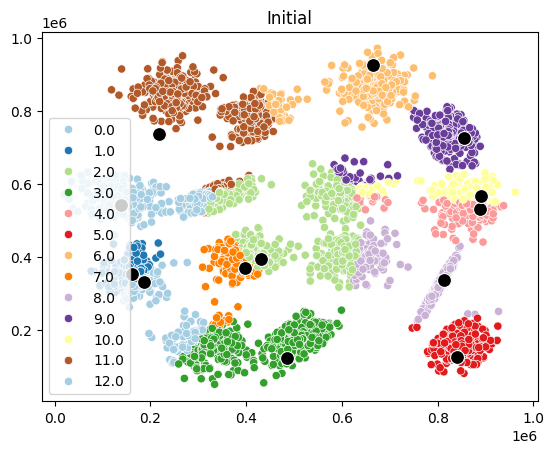

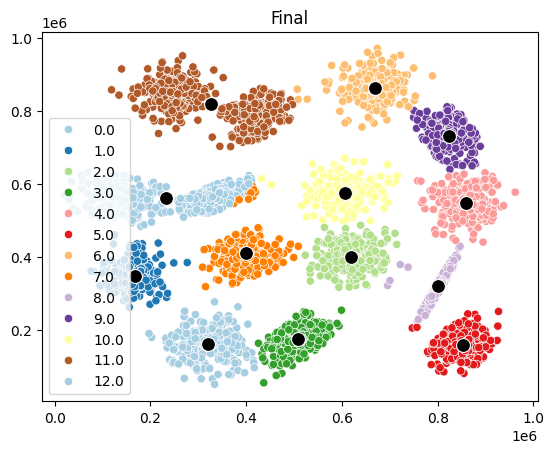

In [ ]:
custom_k_means(X,best_k_silh,verbose=1)

## Using Scikit learn for K Means clustering

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=best_k_silh, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-53-1c5eeea2e382>:2: UserWarning: 
The palette list has fewer values (12) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=km.labels_, palette=sns.color_palette("Paired"))


<Axes: >

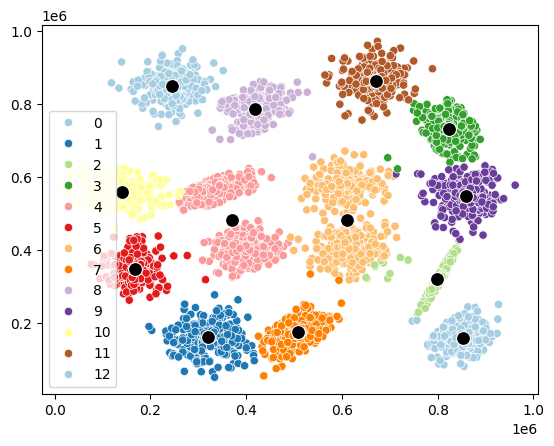

In [ ]:
plt.figure()
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km.labels_, palette=sns.color_palette("Paired"))
new_centroids = recompute_centroids(X,km.labels_,best_k_silh)
sns.scatterplot(x=new_centroids[:, 0],y=new_centroids[:, 1], s=100, c='black')

## Calinski-Harabasz Index for determining k

Calinsky-Harabasz (CH) Index is defined as the following ratio:

$
\text{CHI} = \frac{\text{Normalized BCSSD}}{\text{Normalized WCSSD}}
$

where $\text{Normalized BCSSD}$ denotes the between cluster sum of distances normalized by the degrees of freedom, and $\text{Normalized WCSSD}$ denotes the within cluster sum of distances normalized by degrees of freedom.

In particular, $\text{Normalized BCSSD}$ is computed as:

$
\text{Normalized BCSSD} = \frac{1}{k-1} \sum_{j=1}^{k} |C_j| dist(\mu_j, \mu)  
$

where $\mu_j$ is the centroid of cluster $C_j$ and $\mu$ denotes the centroid of the data set $D$ and $|C_j|$ denotes the number of samples in $C_j$. Note that the normalization constant is $k-1$ since by fixing the $k-1$ centroids and by knowing $\mu$ it is possible to determine the other centroid.

Similarly $\text{Normalized WCSSD}$ is computed as:

$
\text{Normalized WCSSD} = \frac{1}{n-k} \sum_{j=1}^{k} \sum_{x: x\in C_j} dist(x, \mu_j).  
$

Note that $\text{Normalized WCSSD}$ is simply the normalized objective function value of $k$-means obnjective function. The normalization constant is $n-k$ because for each cluster $C_j$ the degrees of freedom are $|C_j|-1$ since by knowing the identity of $|C_j|-1$ points and the centroid $\mu_j$, it is possible to find the identity of the left out point.



In [ ]:
def compute_normalized_BCSSD(centroids, data_centroid, labels, k):
  assert len(centroids)==k, 'Num clusters and num centroids mismatch'
  assert len(centroids)>=2, 'Num clusters must be at least 2'
  bcssd = 0.

  for j in range(len(centroids)):
    num_samples_in_cluster = np.sum(np.where(labels==j))
    bcssd += num_samples_in_cluster*(np.linalg.norm(centroids[j]-data_centroid)**2)
  return bcssd/(len(centroids) - 1)

def compute_calinski_harabasz_index(X,data_centroid,labels,centroids,k):
  normalized_bcssd = compute_normalized_BCSSD(centroids, data_centroid, labels, k)
  normalized_wcssd = compute_ssd(X, labels, centroids, k)/(len(X)-k)
  ch_index = normalized_bcssd/normalized_wcssd
  return ch_index

In [ ]:
#choosing k using calinski-harabasz index method
K = 15
ch_index_list = []
k_list = np.arange(2,K)
data_centroid = np.mean(X, axis=0)

for j in k_list:
  labels, centroids = custom_k_means(X,j)
  #print(len(centroids))
  ch_idx = compute_calinski_harabasz_index(X, data_centroid, labels, centroids, j)
  print('CH index for k:',j, 'is: ', ch_idx)
  ch_index_list.append(ch_idx)


k:2 no change in cluster centroids, quitting k means after 11 iterations:
CH index for k: 2 is:  8429892.497826586
k:3 no change in cluster centroids, quitting k means after 14 iterations:
CH index for k: 3 is:  10688963.96224788
k:4 no change in cluster centroids, quitting k means after 9 iterations:
CH index for k: 4 is:  12921817.596788123
k:5 no change in cluster centroids, quitting k means after 18 iterations:
CH index for k: 5 is:  12189358.938443454
k:6 no change in cluster centroids, quitting k means after 29 iterations:
CH index for k: 6 is:  14678022.749014972
k:7 no change in cluster centroids, quitting k means after 20 iterations:
CH index for k: 7 is:  16772172.132098647
k:8 no change in cluster centroids, quitting k means after 18 iterations:
CH index for k: 8 is:  15910856.374953855
k:9 no change in cluster centroids, quitting k means after 8 iterations:
CH index for k: 9 is:  21132332.58147109
k:10 no change in cluster centroids, quitting k means after 9 iterations:
CH 

13


Text(0.5, 1.0, 'Num clusters vs CH Index')

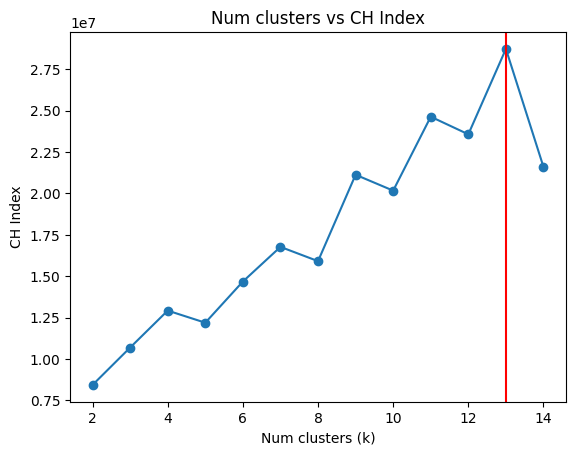

In [ ]:
best_k_chi = k_list[np.argmax(np.array(ch_index_list))]
print(best_k_chi)
fig = plt.figure()
plt.plot(k_list, ch_index_list, marker = 'o')
plt.axvline(best_k_chi, color='red')
plt.ylabel('CH Index')
plt.xlabel('Num clusters (k)')
plt.title('Num clusters vs CH Index')

<ipython-input-41-e888800e40ad>:49: UserWarning: 
The palette list has fewer values (12) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels, palette=sns.color_palette("Paired")).set_title('Initial')


k means iter: 1
k means iter: 2
k means iter: 3
k means iter: 4
k means iter: 5
k means iter: 6
k means iter: 7
k means iter: 8
k means iter: 9
k means iter: 10
k means iter: 11
k means iter: 12
k means iter: 13
k means iter: 14
k means iter: 15
k means iter: 16
k:13 no change in cluster centroids, quitting k means after 16 iterations:


<ipython-input-41-e888800e40ad>:77: UserWarning: 
The palette list has fewer values (12) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels, palette=sns.color_palette("Paired")).set_title('Final')


(array([10., 10., 10., ...,  1.,  1.,  1.]),
 array([[799061.79365079, 324736.3015873 ],
        [669604.77183099, 862576.29577465],
        [152698.3561848 , 457292.16393443],
        [507358.42134831, 175879.70786517],
        [878263.18888889, 176902.64444444],
        [848597.02631579, 143244.91578947],
        [326800.24233129, 818471.64877301],
        [807547.94736842, 190402.38596491],
        [822688.98442368, 730558.5482866 ],
        [368806.55407407, 481180.45481481],
        [610835.75362319, 482935.66988728],
        [858529.97142857, 546434.74857143],
        [316917.1037464 , 165672.01440922]]))

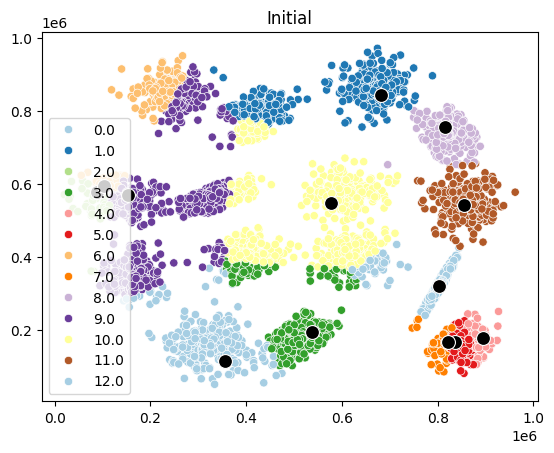

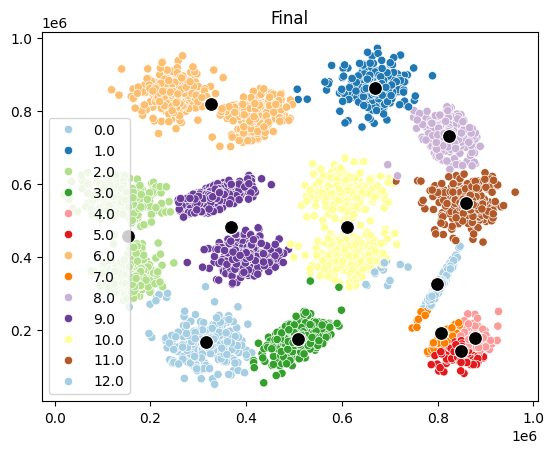

In [ ]:
custom_k_means(X,best_k_chi,verbose=1)

#Agglomerative clustering

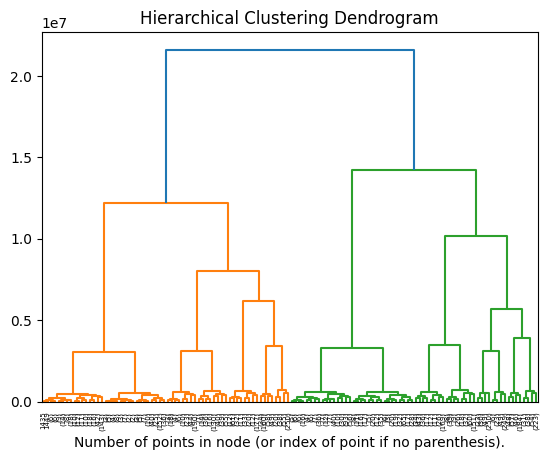

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
agg_clust = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

agg_clust = agg_clust.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
#Exercise 1
#Try to understand the K-Means++ algorithm implemented in scikit learn package.
#[R]For the data in S1.txt, vary the number of clusters K by choosing from the set {6,7,8,9,10,11,12,13} and use the data in the KMeans function of scikit learn package.
#[R]For each value of K, prepare the scatter plots depicting the clusters using different colors along with the cluster centers depicted in the same plot with a color different from those used for clusters.
#[R]Explain your observations about the clustering results you obtained when the value of K is increased from 6 till 13.
#[R}Consider the test.txt given in moodle and find the predictions for the points in test.txt for clustering obtained for each value of K. Plot the points in the scatter plot and indicate the predicted cluster labels.
#[R]Explain your observations about the predictions obtained for different values of K.
#[R]Can you suggest your procedure which can be used to find the best choice for the number of clusters?
#[R]Implement your procedure for the data from S1.txt and report the best choice for the number of clusters.

#[R]Explain how you can modify the data in S1.txt so that the mean of each column is 0 and variance is 1. This procedure is called column normalization.
#[R]Write the appropriate code to do the column normalization.
#[R]On the new data set thus obtained where the columns have mean 0 and variance 1, repeat the clustering for K in {5,6,7,8,9,10,11,12,13}.
#[R]For each value of K, prepare the scatter plots depicting the clusters using different colors along with the cluster centers depicted in the same plot with a color different from those used for clusters.
#[R]Explain your observations about the clustering results you obtained when the value of K is increased from 5 till 13.
#[R]Explain how you will modify the test data given in test.txt file so that it can be used for prediction? Using your idea, convert the data in test.txt so that it can be used for prediction and report the predicted labels. Prepare scatter plots where you plot the transformed data from test.txt.
#[R]Explain your observations about the predictions obtained for different values of K.
#[R]Using your procedure to find the best choice of number of clusters, report the best choice for the number of clusters for the column normalized data.
#[R]Did you observe any differences when the data from S1.txt was used without normalization and with normalization?  Explain.
#[R]Did you observe any differences during prediction when the data from S1.txt was used for clustering without normalization and with normalization?  Explain.
#[R]Explain a situation where normalizing the data might help.



In [ ]:
#Exercise 2
#Answer the following questions for the other data sets from b4.txt, e3.txt, u1.txt files posted in moodle.

#[R]Vary the number of clusters K by choosing from the set {3,5,7,9,11,13,15,17,19} and use the data in the KMeans function of scikit learn package.
#[R]For each value of K, prepare the scatter plots depicting the clusters using different colors along with the cluster centers depicted in the same plot with a color different from those used for clusters.
#[R]Explain your observations about the clustering results you obtained when the value of K is increased from 3 till 19.
#[R}Consider the test.txt given in moodle and find the predictions for the points in test.txt for clustering obtained for each value of K. Plot the points in the scatter plot and indicate the predicted cluster labels.
#[R]Explain your observations about the predictions obtained for different values of K.
#[R]Using your procedure to find the best choice of number of clusters derived in Exercise 1, report the best choice for the number of clusters for the column normalized data.


#Normalize the columns of the data to be of mean 0 and variance 1.
#[R]On the new data set thus obtained where the columns have mean 0 and variance 1, repeat the clustering for K in {3,5,7,9,11,13,15,17,19}.
#[R]For each value of K, prepare the scatter plots depicting the clusters using different colors along with the cluster centers depicted in the same plot with a color different from those used for clusters.
#[R]Explain your observations about the clustering results you obtained when the value of K is increased from 3 till 19.
#[R]Modify the test data given in test.txt file so that it can be used for prediction and report the predicted labels. Prepare scatter plots where you plot the transformed data from test.txt.
#[R]Explain your observations about the predictions obtained for different values of K.
#[R]Using your procedure to find the best choice of number of clusters, report the best choice for the number of clusters for the column normalized data.
#[R]Did you observe any differences when the data was used without normalization and with normalization?  Explain.
#[R]Did you observe any differences during prediction when the data was used for clustering without normalization and with normalization?  Explain.


In [ ]:
#Exercise 3
#Consider the data set from f8.txt
#Perform K-Means clustering on the data from f8.txt using scikit learn package.
#[R]Explain how you will visualize the clusters for the data from f8.txt?
#[R]Design and illustrate a suitable idea for visualizing the clusters obtained for data from f8.txt. Implement your idea and prepare the required plots to visualize the clusters.
#[R]Plot the cluster centers in the plots thus prepared.